# Sentiment Analysis on Product Reviews
This notebook performs **sentiment analysis** on product reviews using **Scikit-learn** and **Matplotlib**. I will explore a dataset of customer reviews labeled as simply as either `positive` or `negative`.

# Requirements:

In [8]:
import sys
!{sys.executable} -m pip install pandas numpy matplotlib seaborn scikit-learn nltk

Defaulting to user installation because normal site-packages is not writeable
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 2.4 MB/s eta 0:00:00
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 43.7 MB/s eta 0:00:0000:010:01
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
Using cached joblib-1.5.1-py3-none-any.whl (307 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.6/284.6 kB 24.9 MB/s eta 0:00:00
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 kB 12.3 MB/s eta 0:00:00
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
  Conside

In [14]:
import sys
!{sys.executable} -m pip install --upgrade certifi

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [15]:
import ssl
import certifi
ssl._create_default_https_context = ssl._create_unverified_context

In [16]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/banasreesarkarmou/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import string
from nltk.corpus import stopwords

##  Load the Dataset

In [21]:
df = pd.read_csv("product_reviews.csv")
df.head()

,review_id,review_text,sentiment
0,1,Would definitely recommend to others.,positive
1,2,"Incredible results, much better than expected.",positive
2,3,Product arrived damaged and unusable.,negative
3,4,Instructions were confusing and unhelpful.,negative
4,5,"Really bad quality, broke after two days.",negative


## Visualize Sentiment Distribution of the Data

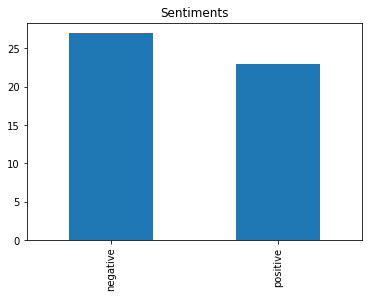

In [25]:
df['sentiment'].value_counts().plot(kind='bar', title='Sentiments')
plt.show()

##  Text Preprocessing

In [27]:
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    words = [w for w in words if w not in stopwords.words('english')]
    return ' '.join(words)

df['clean_text'] = df['review_text'].apply(preprocess_text)
df[['review_text', 'clean_text']].head()

,review_text,clean_text
0,Would definitely recommend to others.,would definitely recommend others
1,"Incredible results, much better than expected.",incredible results much better expected
2,Product arrived damaged and unusable.,product arrived damaged unusable
3,Instructions were confusing and unhelpful.,instructions confusing unhelpful
4,"Really bad quality, broke after two days.",really bad quality broke two days


##  TF-IDF Vectorization

In [28]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_text']) # X is the matrix of TF-IDF features
y = df['sentiment'].map({'positive': 1, 'negative': 0}) # y is the target variable: maps positive → 1, negative → 0

##  Train Logistic Regression Model

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


##  Model Evaluation

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



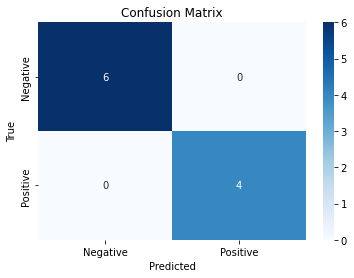

In [30]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

##  ROC Curve

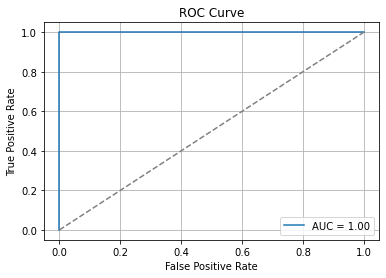

In [31]:
y_scores = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

## Most Important Words

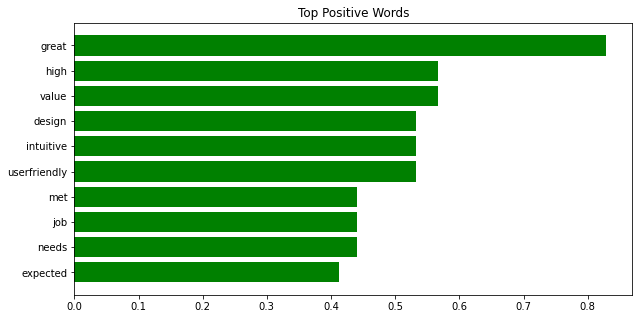

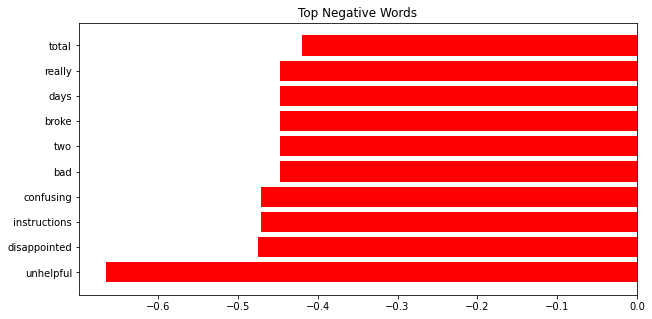

In [32]:
feature_names = np.array(vectorizer.get_feature_names_out())
coefs = model.coef_[0]

# Top positive and negative words
top_pos = np.argsort(coefs)[-10:]
top_neg = np.argsort(coefs)[:10]

plt.figure(figsize=(10, 5))
plt.barh(feature_names[top_pos], coefs[top_pos], color='green')
plt.title("Top Positive Words")
plt.show()

plt.figure(figsize=(10, 5))
plt.barh(feature_names[top_neg], coefs[top_neg], color='red')
plt.title("Top Negative Words")
plt.show()